# Fuzzy C-Means
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
df = pd.read_csv('../../dataset/student_lifestyle_100k.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].fillna(df[numeric_cols].mean()).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

sample_size = min(5000, len(X_scaled))
sample_idx = np.random.choice(len(X_scaled), sample_size, replace=False)
X_fcm = X_scaled[sample_idx]

print(f'FCM data shape: {X_fcm.shape}')

FCM data shape: (5000, 8)


In [3]:
X_fcm_T = X_fcm.T
optimal_k = 5

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_fcm_T, c=optimal_k, m=2, error=0.005, maxiter=100, init=None
)

labels_temp = np.argmax(u, axis=0)
labels = np.zeros(len(X_scaled), dtype=int)
labels[sample_idx] = labels_temp

print(f'Partition Coefficient: {fpc:.4f}')
print(f'Silhouette Score: {silhouette_score(X_fcm, labels_temp):.4f}')

Partition Coefficient: 0.2000
Silhouette Score: 0.0300


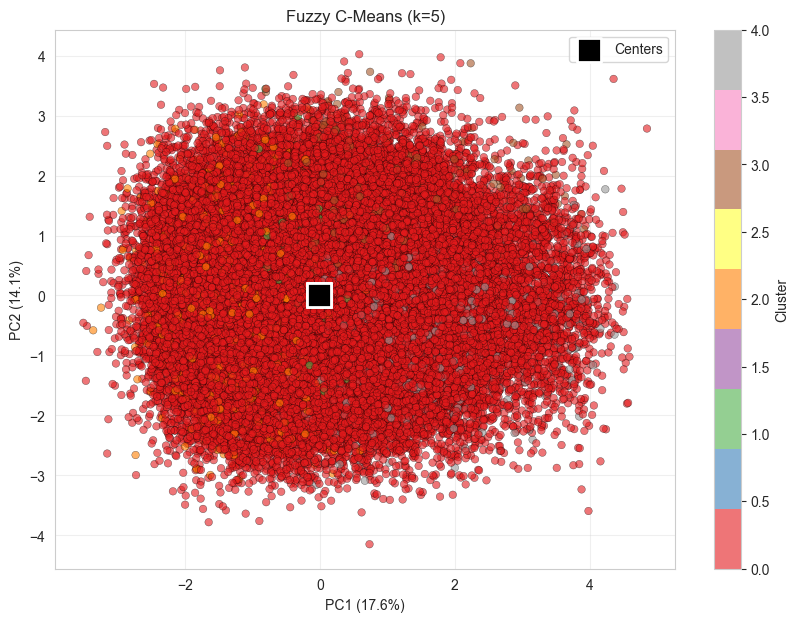

In [5]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='Set1', 
                       s=30, alpha=0.6, edgecolors='black', linewidth=0.3)
centers_2d = pca.transform(cntr)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', marker='s', s=300, 
            edgecolors='white', linewidth=2, label='Centers')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title(f'Fuzzy C-Means (k={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(alpha=0.3)
plt.show()